# CNN on CIFAR-10
## Pre-processing

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

C:\Users\Chiu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
y_label_test_OneHot.shape

(10000, 10)

## Build the Model

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model=Sequential()

In [9]:
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 input_shape=(32, 32, 3),
                 activation='relu',
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3,3),
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
# Flatten
model.add(Flatten())
model.add(Dropout(0.25))

In [17]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))

In [18]:
model.add(Dense(10, activation='softmax'))

In [19]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

## Start the training

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [23]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10,
                        batch_size=128, 
                        verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 97s - loss: 1.5021 - acc: 0.4591 - val_loss: 1.2715 - val_acc: 0.5818
Epoch 2/10
 - 96s - loss: 1.1366 - acc: 0.5969 - val_loss: 1.1136 - val_acc: 0.6347
Epoch 3/10
 - 97s - loss: 0.9810 - acc: 0.6562 - val_loss: 1.0224 - val_acc: 0.6555
Epoch 4/10
 - 95s - loss: 0.8730 - acc: 0.6917 - val_loss: 0.9424 - val_acc: 0.6959
Epoch 5/10
 - 96s - loss: 0.7848 - acc: 0.7243 - val_loss: 0.8744 - val_acc: 0.7088
Epoch 6/10
 - 98s - loss: 0.6992 - acc: 0.7538 - val_loss: 0.8516 - val_acc: 0.7173
Epoch 7/10
 - 100s - loss: 0.6180 - acc: 0.7849 - val_loss: 0.8114 - val_acc: 0.7275
Epoch 8/10
 - 99s - loss: 0.5550 - acc: 0.8045 - val_loss: 0.7793 - val_acc: 0.7418
Epoch 9/10
 - 98s - loss: 0.4836 - acc: 0.8315 - val_loss: 0.8142 - val_acc: 0.7173
Epoch 10/10
 - 95s - loss: 0.4342 - acc: 0.8493 - val_loss: 0.7839 - val_acc: 0.7281


### Plot of accuracy

In [24]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Accuracy Graph

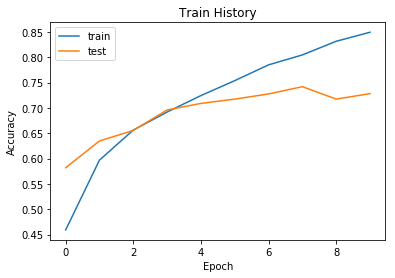

In [25]:
show_train_history('acc','val_acc')

### Loss Graph

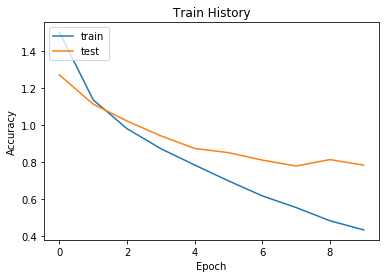

In [26]:
show_train_history('loss','val_loss')

## Evaluation

In [27]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=1)
scores[1]

10000/10000 [==============================] - 5s 534us/step


0.7245

## Prediction

In [28]:
prediction = model.predict_classes(x_img_test_normalize)

In [29]:
prediction[:10]

array([3, 8, 0, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

In [30]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [31]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

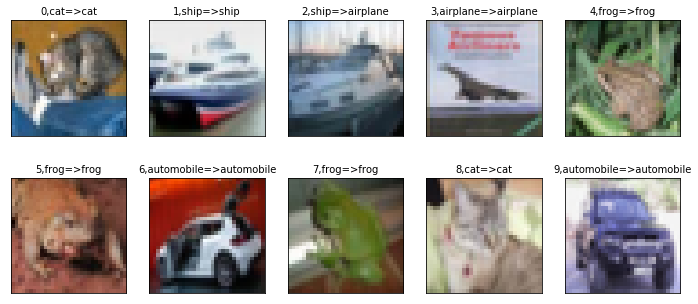

In [32]:
plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,0,10)

## Check predicted probability for target

In [33]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [41]:
def show_Predicted_Probability(y, prediction, x_img, Predicted_Probability, i):
    print('label:', label_dict[y[i][0]],
          ', predict:', label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i], (32, 32, 3)))
    plt.show
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat , predict: cat
airplane Probability:0.002088196
automobile Probability:0.007013400
bird Probability:0.010420453
cat Probability:0.741480768
deer Probability:0.005241044
dog Probability:0.182803825
frog Probability:0.019596398
horse Probability:0.002530810
ship Probability:0.028248081
truck Probability:0.000576918


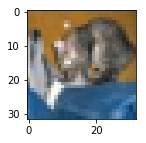

In [42]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability, 0)

label: airplane , predict: airplane
airplane Probability:0.564660788
automobile Probability:0.001124604
bird Probability:0.097212031
cat Probability:0.002819307
deer Probability:0.035412401
dog Probability:0.000081637
frog Probability:0.000198372
horse Probability:0.000137204
ship Probability:0.297702283
truck Probability:0.000651391


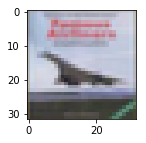

In [43]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability, 3)

## Confusion (error) matrix

In [45]:
prediction.shape

(10000,)

In [47]:
y_label_test.shape
# y_label_test is 2-dimensional, which means it has to be transformed to 1 dimension for crosstab use

(10000, 1)

### Use reshape(-1) for 1-dimensional transformation

In [49]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [50]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,736,12,86,15,25,12,22,6,56,30
1,14,780,18,14,3,8,27,1,37,98
2,44,1,610,32,102,63,114,18,7,9
3,12,7,79,451,80,186,146,20,10,9
4,11,1,61,30,738,26,103,21,7,2
5,7,2,54,117,65,645,79,23,3,5
6,2,2,28,22,15,15,910,3,2,1
7,10,1,41,26,92,60,26,736,3,5
8,43,17,33,16,13,3,20,1,830,24
